<a href="https://colab.research.google.com/github/samikshyasanskruti/MachineLearning-Practice-with-Python/blob/main/3_Predicting_Online_Ad_Click_Through_with_Tree_Based_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Decision Tree Implementation***

**1.Sample dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
X_train=np.array([[6,7],[2,4],[7,2],[3,6],[4,7],[5,2],[1,6],[2,0],[6,3],[4,1]])
y_train=np.array([0,0,0,0,0,1,1,1,1,1])

**2.Implement Decision tree with Scikit-learn**

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_sk=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=2)
tree_sk.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

**3.Visualizing Tree**

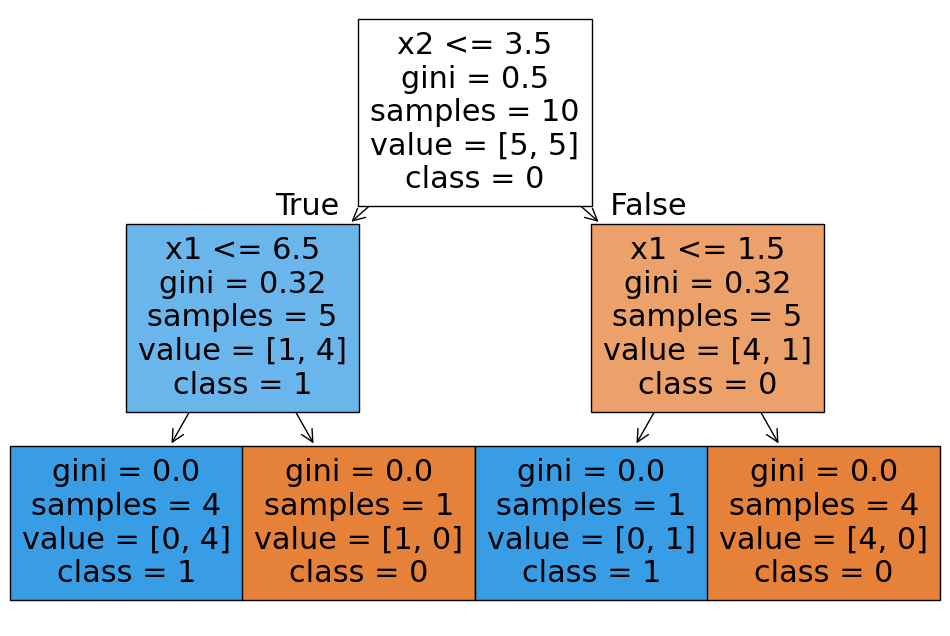

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(tree_sk,filled=True,feature_names=['x1','x2'],class_names=['0','1'])
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv(r'/content/train.csv')
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50.0,1722.0,0.0,35.0,-1.0,79.0
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50.0,1722.0,0.0,35.0,100084.0,79.0
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50.0,1722.0,0.0,35.0,100084.0,79.0
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50.0,1722.0,0.0,35.0,100084.0,79.0
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50.0,2161.0,0.0,35.0,-1.0,157.0


**2.Target click**

In [ ]:
y=df[['click']]

**3. id,hour,device_id and device_ip do not contain much useful information.Drop these columns from the dataframe(including target column)**

In [ ]:
X = df.drop(columns=['click','id','hour','device_id','device_ip'],axis=1)


**4.Sample Size**

In [ ]:
print(X.shape,y.shape)

(26578, 19) (26578, 1)


**5.Split  into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(21262, 19) (5316, 19) (21262, 1) (5316, 1)


**6.Encode categorical data by OneHotEncoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')

**7. Fit and transform enc by train data**

In [ ]:
X_train_enc=enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
print(X_train_enc[0])
print(X_train_enc[1])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19 stored elements and shape (1, 3618)>
  Coords	Values
  (0, 2)	1.0
  (0, 6)	1.0
  (0, 83)	1.0
  (0, 782)	1.0
  (0, 934)	1.0
  (0, 1323)	1.0
  (0, 1368)	1.0
  (0, 1389)	1.0
  (0, 1687)	1.0
  (0, 2969)	1.0
  (0, 2972)	1.0
  (0, 3080)	1.0
  (0, 3298)	1.0
  (0, 3301)	1.0
  (0, 3344)	1.0
  (0, 3428)	1.0
  (0, 3431)	1.0
  (0, 3465)	1.0
  (0, 3592)	1.0
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19 stored elements and shape (1, 3618)>
  Coords	Values
  (0, 2)	1.0
  (0, 6)	1.0
  (0, 67)	1.0
  (0, 903)	1.0
  (0, 924)	1.0
  (0, 1323)	1.0
  (0, 1368)	1.0
  (0, 1389)	1.0
  (0, 1791)	1.0
  (0, 2969)	1.0
  (0, 2972)	1.0
  (0, 3065)	1.0
  (0, 3298)	1.0
  (0, 3301)	1.0
  (0, 3336)	1.0
  (0, 3425)	1.0
  (0, 3430)	1.0
  (0, 3465)	1.0
  (0, 3603)	1.0


**8. Create Decision tree model for max_depth=[3,10,None],and minimum saple 30.Find accuracy_score,roc_auc_score of each model.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

max_depth=[3,10,None]
for depth in max_depth:
  decision_tree=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=30)
  decision_tree.fit(X_train_enc,y_train)
  y_pred=decision_tree.predict(X_test_enc)
  print(f"max depth: {depth}")
  print(f"accuracy: {accuracy_score(y_test,y_pred)}")
  print(f"roc_auc: {roc_auc_score(y_test,y_pred)}")

max depth: 3
accuracy: 0.8338976674191121
roc_auc: 0.5557500404007756
max depth: 10
accuracy: 0.832392776523702
roc_auc: 0.5303748181965094
max depth: None
accuracy: 0.8162151993980437
roc_auc: 0.5562393947963801


**9.Find best parameter by using GridSeachCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[3,10,None],'min_samples_split':[30]}

grid_search=GridSearchCV(decision_tree,parameters,cv=3,scoring='roc_auc')
grid_search.fit(X_train_enc,y_train)

print("Best parameters: ",grid_search.best_params_)
print("Best score: ",grid_search.best_score_)


Best parameters:  {'max_depth': 10, 'min_samples_split': 30}
Best score:  0.6771442586112645


# ***Random Forest Implementation***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(
    n_estimators=200,        #Number of trees
    max_depth=10,            #Tree depth limit
    criterion='gini',        #Tree spliting criterion
    min_samples_split=20,     #Min samples to split
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
random_forest

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

**2.Train random_forest model and find accuracy_score,roc_auc_score**

In [ ]:
random_forest.fit(X_train_enc,y_train)
y_pred_rf=random_forest.predict(X_test_enc)
print("Random Forest Accuracy : ",accuracy_score(y_test,y_pred_rf))
print("Random Forest ROC AUC : ",roc_auc_score(y_test,y_pred_rf))

Random Forest Accuracy :  0.5618886380737397
Random Forest ROC AUC :  0.6391023957659987


**3. Find best parameters for Random Forest Model**

In [ ]:
param_grid={
     'n_estimators':[100,150,200],
     'max_depth':[10,15,20],
     'min_samples_split':[10,20,30],
     'max_features':['sqrt','log2',0.3], # Corrected parameter name
     'class_weight':['balanced']
}
grid_search=GridSearchCV(random_forest,param_grid,cv=3,scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_enc,y_train)
print("Best parameters: ",grid_search.best_params_)
print("Best score: ",grid_search.best_score_)

Best parameters:  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 0.3, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.7208776624968282


# ***XGBoost Implementation***

**1.Explore all parameters of XGBoost**

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, min_samples_leaf=5,
              min_samples_split=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, ...)

**2.Train xgb model, and find accuracy score, roc auc score**

In [ ]:
xgb_model .fit( X_train_enc , y_train )
y_pred_xgb = xgb_model . predict ( X_test_enc )
print (" XGBoost Accuracy :", accuracy_score (y_test , y_pred_xgb ) )
print (" XGBoost ROC AUC:", roc_auc_score (y_test , y_pred_xgb ) )


 XGBoost Accuracy : 0.8337095560571859
 XGBoost ROC AUC: 0.5520776098901098


**3.Find best parameter by RandomizedSearchCV**

In [ ]:
import xgboost as xgb
from sklearn . model_selection import RandomizedSearchCV
param_distributions = {  'learning_rate':[0.01, 0.05, 0.1, 0.2] ,
                         'max_depth': [3, 4, 5, 6, 7] ,
                         'min_child_weight': [1, 3, 5, 7] ,
                         'subsample': [0.6, 0.7, 0.8, 0.9] ,
                         'colsample_bytree':[0.6, 0.7, 0.8, 0.9] ,
                         'reg_alpha':[0, 0.01, 0.1, 1] ,
                         'reg_lambda': [0.1, 1, 10, 100] }
random_search = RandomizedSearchCV (xgb_model , param_distributions ,n_iter =100, cv=3, scoring ='roc_auc', n_jobs = -1,random_state =42)
random_search .fit( X_train_enc , y_train )
print ("Best parameters :", random_search . best_params_ )
print ("Best score :", random_search . best_score_ )

Best parameters : {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best score : 0.7257242092005516


**4.Find best parameter by GridSearchCV**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=25,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_enc, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best score: 0.7299168025792279
